In [71]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [72]:
training_data = pd.read_csv("house-prices-advanced-regression-techniques/stringless_train.csv", index_col="Id")
testing_data = pd.read_csv("house-prices-advanced-regression-techniques/stringless_test.csv", index_col="Id")

In [73]:
all_data = pd.concat((training_data, testing_data)).reset_index(drop=True)
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# Forest regression starts here 50:50

In [87]:
training_data = all_data.iloc[:1460, :]
testing_data = all_data.iloc[-1459:, :]
display((training_data.shape, testing_data.shape), training_data.head())

((1460, 37), (1459, 37))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [88]:
X_train, X_test = training_data.iloc[:,:-1], testing_data.iloc[:,:-1]
#X_test
y_train, y_test = training_data.iloc[:,-1:], testing_data.iloc[:,-1:]
#y_test.drop(['SalePrice'], axis=1, inplace=True)
display(X_train.head(), y_train.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


In [89]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_25152\3799881120.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor()

In [90]:
X_train.shape, X_test.shape

((1460, 36), (1459, 36))

# Random Forest Model Prediction for 50% of missing housing data

In [91]:
print("model score on training data:", forest.score(X_train, y_train))
#print("model score on test data:", forest.score(X_test, y_test)) # we do not need this as we do not yet have any prices to compare the random forest model for the missing data
y_predicted = forest.predict(X_test) # This becomes our predicted prices for the missing dataset using forest prediction
y_predicted

model score on training data: 0.9808487458531411


array([126371.83, 157886.4 , 178147.4 , ..., 157278.5 , 111161.68,
       238658.79])

# Reverse Forest 50:50 split to verify that the prediction is correct

should we add an averaging model to this as there is some variance as high as 2% when rerunning the randomforest model

In [92]:
forest = RandomForestRegressor()
forest.fit(X_test, y_predicted)

RandomForestRegressor()

In [93]:
print("model score on training data:", forest.score(X_test, y_predicted))
print("model score on test data:", forest.score(X_train, y_train))

model score on training data: 0.9968371277290502
model score on test data: 0.853883141054086


In [83]:
y_predicted = pd.DataFrame(y_predicted, columns = ['SalePrice'])

testing_data = testing_data.reset_index()
testing_data["SalePrice"] = y_predicted
testing_data.drop(['index'], axis=1, inplace=True)
testing_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,127302.58
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,156274.50
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,181020.91
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,360,36,0,0,0,0,0,6,2010,185593.65
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,82,0,0,144,0,0,1,2010,195886.35


# Matrix

In [84]:
matrix = testing_data.corr().abs()
columns_to_keep = matrix.iloc[-1, :]>=0.6
rows_to_keep = matrix.iloc[:, -1]>=0.6
new_matrix = matrix.loc[rows_to_keep, columns_to_keep]
new_matrix.shape

(8, 8)

<AxesSubplot:>

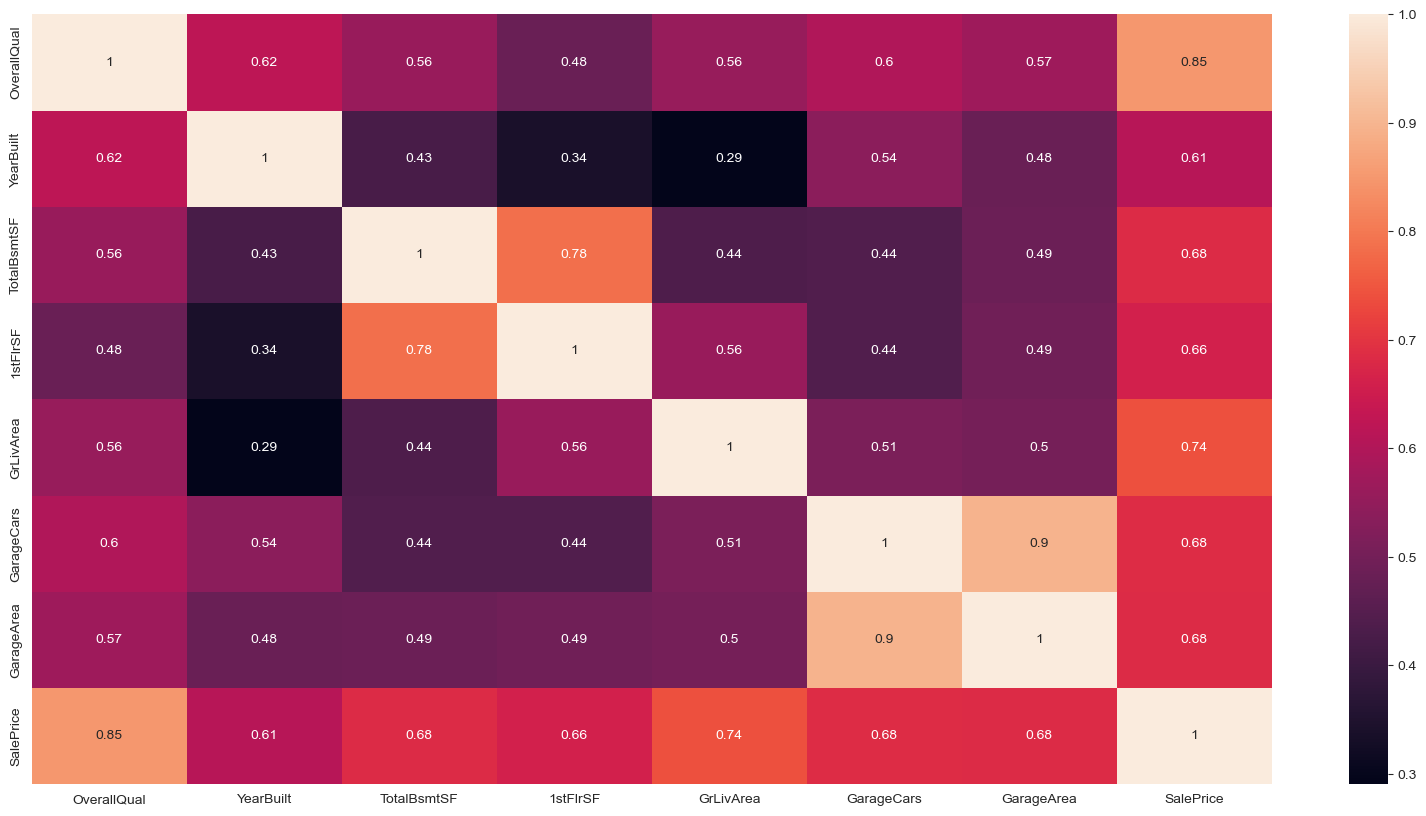

In [85]:
plt.figure(figsize=(20,10))
sns.heatmap(new_matrix,  annot=True)

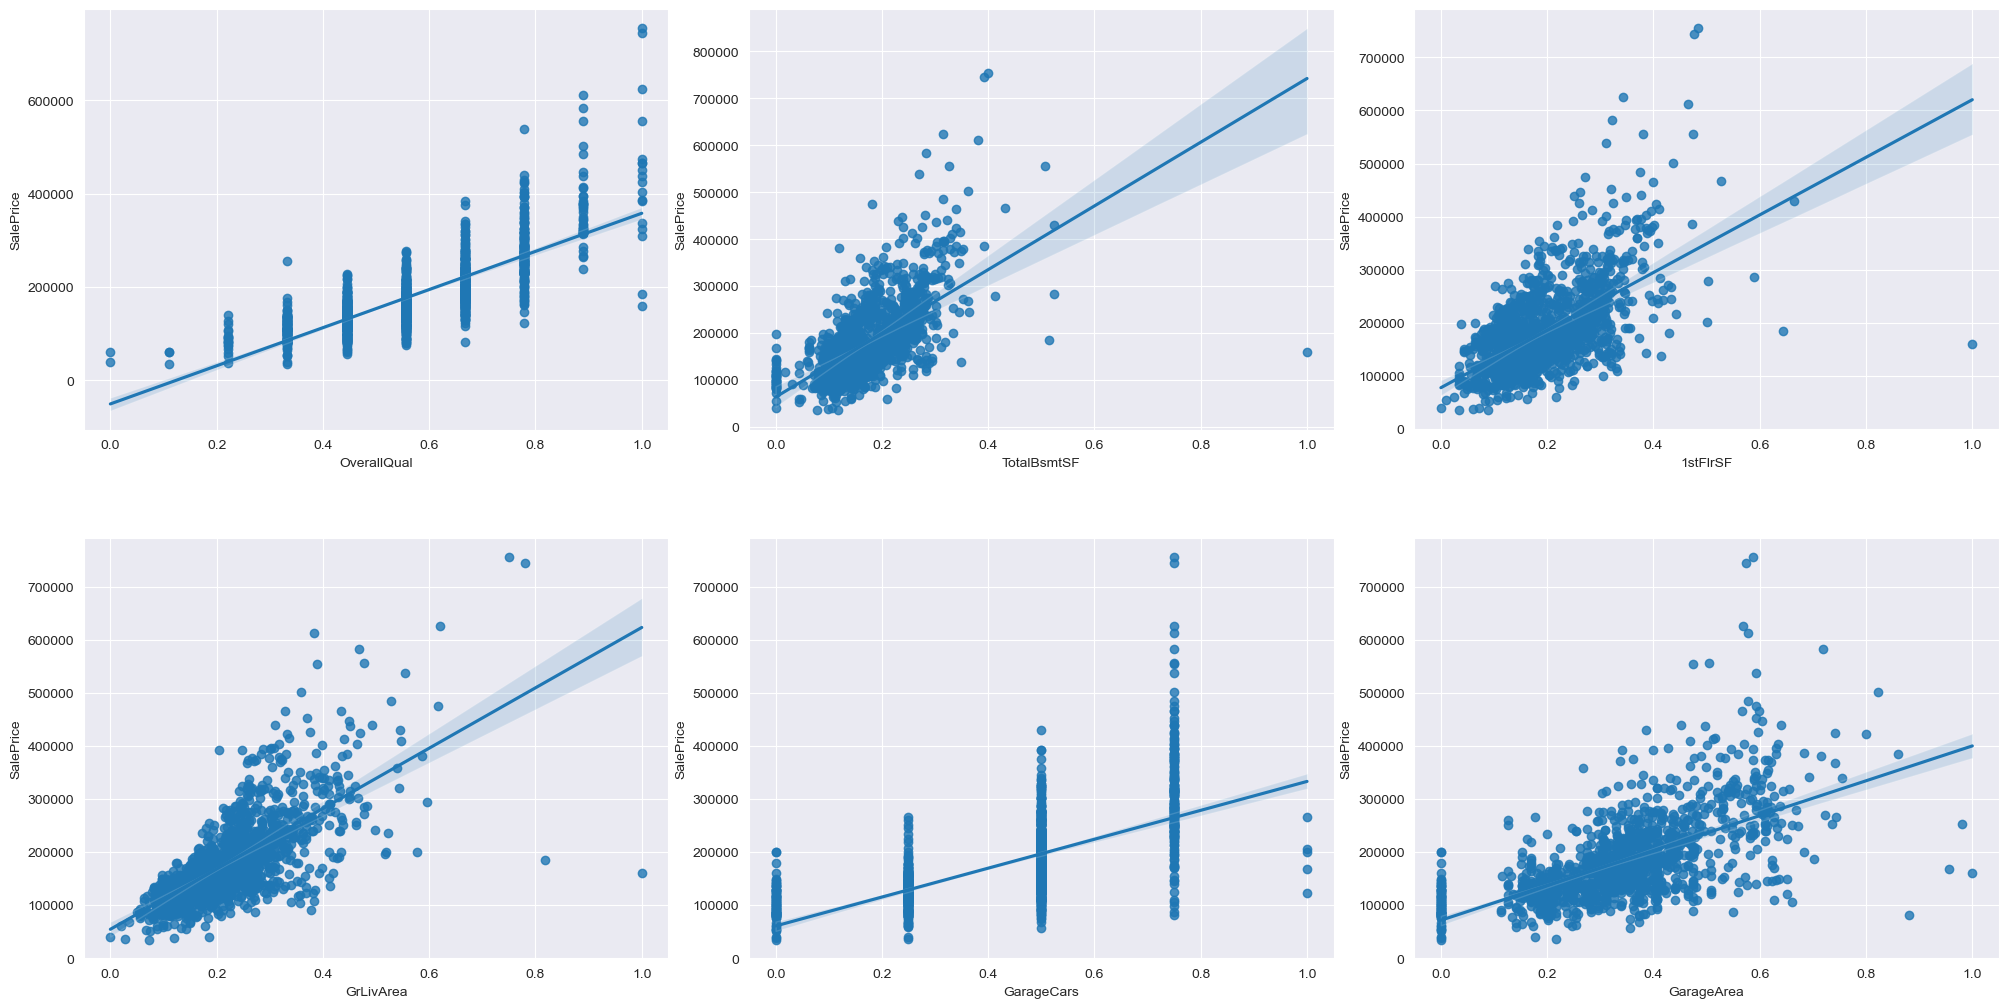

In [86]:
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
x = training_data.loc[:,column_sels]
y = training_data['SalePrice']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)